In [61]:
from random import random
import pandas as pd
import numpy as np
import random
import csv
from pdb import set_trace
import pdb
#%pdb
#mypath = 'E:/OneDrive - University College London/load/pilot_6_data/'
#mypath = 'C:/Users/KeK/OneDrive - University College London/load/pilot_6_data/'
%load_ext autoreload
%autoreload 2
%matplotlib inline

from process import *
#from test import *
from tables import *

pd.set_option('display.max_rows', 9000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
f = '../output/participant_7.pik'
import pickle
with open(f,'r') as of:
    D = pickle.load(of)
df = pd.DataFrame.from_dict(D['experiment_details'],orient='index')

new_df, notes = process(df)
print notes

960
MEAN TO:  1.1834716151
TO WINDOW:  0.428892306638 1.93805092356
TO rejects n:  1
VS rejects N:  3
CORRECT VS:  110
{'vs_accuracy_diff': 0.2229760289461783, 'tone_detection_accuracy_low': 0.875, 'false_alarms_low': 0, 'tone_detection_accuracy_diff': 0.04166666666666663, 'tone_detection_accuracy_high': 0.8333333333333334, 'false_alarms_high': 0, 'vs_accuracy_high': 0.7164179104477612, 'vs_accuracy_low': 0.9393939393939394}


In [39]:
participants = ['1','2','3','4','5','7','8','9','10','11','12','14','15','17']

In [25]:
results = {}
for p in participants:
    df_out,notes = process_observer(p)
    results[p] = notes

960
MEAN TO:  1.47927871794
TO WINDOW:  0.453356333156 2.50520110272
TO rejects n:  0
VS rejects N:  2
CORRECT VS:  117
960
MEAN TO:  1.64327474029
TO WINDOW:  0.942279519948 2.34426996063
TO rejects n:  0
VS rejects N:  6
CORRECT VS:  116
960
MEAN TO:  1.32639641756
TO WINDOW:  0.515620599767 2.13717223536
TO rejects n:  1
VS rejects N:  4
CORRECT VS:  109
960
MEAN TO:  0.888448123494
TO WINDOW:  -3.98146126077 5.75835750776
TO rejects n:  1
VS rejects N:  6
CORRECT VS:  118
960
MEAN TO:  1.24973741412
TO WINDOW:  0.370487393209 2.12898743502
TO rejects n:  1
VS rejects N:  3
CORRECT VS:  129
960
MEAN TO:  1.1834716151
TO WINDOW:  0.428892306638 1.93805092356
TO rejects n:  1
VS rejects N:  3
CORRECT VS:  110
960
MEAN TO:  1.15074708319
TO WINDOW:  0.253489353005 2.04800481338
TO rejects n:  1
VS rejects N:  3
CORRECT VS:  117
960
MEAN TO:  1.33964470157
TO WINDOW:  0.616400066294 2.06288933686
TO rejects n:  0
VS rejects N:  6
CORRECT VS:  106
960
MEAN TO:  1.48571804182
TO WINDOW:  

In [26]:
results

{'1': {'false_alarms_high': 0,
  'false_alarms_low': 0,
  'tone_detection_accuracy_diff': 0.16666666666666669,
  'tone_detection_accuracy_high': 0.25,
  'tone_detection_accuracy_low': 0.4166666666666667,
  'vs_accuracy_diff': 0.15431235431235435,
  'vs_accuracy_high': 0.8153846153846154,
  'vs_accuracy_low': 0.9696969696969697},
 '10': {'false_alarms_high': 0,
  'false_alarms_low': 0,
  'tone_detection_accuracy_diff': -0.16666666666666663,
  'tone_detection_accuracy_high': 0.75,
  'tone_detection_accuracy_low': 0.5833333333333334,
  'vs_accuracy_diff': 0.12215320910973082,
  'vs_accuracy_high': 0.782608695652174,
  'vs_accuracy_low': 0.9047619047619048},
 '11': {'false_alarms_high': 0,
  'false_alarms_low': 0,
  'tone_detection_accuracy_diff': -0.20833333333333331,
  'tone_detection_accuracy_high': 0.625,
  'tone_detection_accuracy_low': 0.4166666666666667,
  'vs_accuracy_diff': -0.046675191815856776,
  'vs_accuracy_high': 0.8260869565217391,
  'vs_accuracy_low': 0.7794117647058824},
 

In [27]:
# Preparing table for visual-search task
visual_search_task_data=np.zeros((14,3))

for i,p in enumerate(participants):
    visual_search_task_data[i,0] = results[p]['vs_accuracy_high']*100
    visual_search_task_data[i,1] = results[p]['vs_accuracy_low']*100
    visual_search_task_data[i,2] = results[p]['vs_accuracy_diff']*100

    
visual_search_task_data = np.round(visual_search_task_data,1)

In [28]:
# Preparing table for tone-detection task
detection_task_data=np.zeros((14,3))

for i,p in enumerate(participants):
    detection_task_data[i,0] = results[p]['tone_detection_accuracy_high']*100
    detection_task_data[i,1] = results[p]['tone_detection_accuracy_low']*100
    detection_task_data[i,2] = results[p]['tone_detection_accuracy_diff']*100

    
detection_task_data = np.round(detection_task_data,1)

In [29]:
# Preparing table for false alarms
false_alarms_data=np.zeros((14,2))

for i,p in enumerate(participants):
    false_alarms_data[i,0] = int(results[p]['false_alarms_low'])
    false_alarms_data[i,1] = results[p]['false_alarms_high']


In [42]:
len(participants)

14

In [41]:
participants = np.arange(1,len(participants)+1)


In [43]:
f = open('reports/my_table_3.html','wb')
f.write('<html><body>')
f.write("<link rel='stylesheet' type='text/css' href='main.css'>")
#Table for Visual-search task
make_table('Visual Search Task: only trials without tones and without false alarms to tones (spacebar responses)',['Participant','Accuracy: high','Accuracy: low','Accuracy: low - high'],participants,visual_search_task_data,f)
#Table for Tone-detection task
make_table('Tone Detection Task',['Participant','Accuracy: high','Accuracy: low','Accuracy: low - high'],participants,detection_task_data,f)
#Table for false alarms (in tone detection)
make_table('Tone Detection Task: absolute number of false alarms',['Participant','False alarms: low','False alarms: high'],participants,false_alarms_data,f)
f.write('</body></html>')
f.close()

In [44]:
detection_task_data

array([[ 25. ,  41.7,  16.7],
       [  8.3,  12.5,   4.2],
       [ 58.3,  66.7,   8.3],
       [ 54.2,  50. ,  -4.2],
       [ 91.7,  91.7,   0. ],
       [ 83.3,  87.5,   4.2],
       [ 83.3,  75. ,  -8.3],
       [ 70.8,  75. ,   4.2],
       [ 75. ,  58.3, -16.7],
       [ 62.5,  41.7, -20.8],
       [ 54.2,  66.7,  12.5],
       [ 79.2,  95.8,  16.7],
       [ 87.5,  83.3,  -4.2],
       [ 87.5,  95.8,   8.3]])

In [46]:
np.mean(detection_task_data[:,2])

1.4928571428571431

In [47]:
np.mean(detection_task_data[:,1] - detection_task_data[:,0])

1.4928571428571431

In [55]:
stats.ttest_rel(detection_task_data[:,1], detection_task_data[:,0])

Ttest_relResult(statistic=0.49025624913261667, pvalue=0.63212288278376261)

In [52]:
from scipy import stats as stats

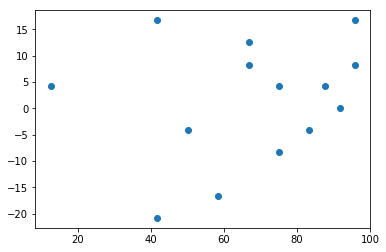

In [62]:
plt.scatter(detection_task_data[:,1], detection_task_data[:,2])

In [59]:
import matplotlib.pyplot as plt

In [63]:
stats.pearsonr(detection_task_data[:,1], detection_task_data[:,2])

(0.21758789639280501, 0.45490773561709785)